# CPU Scheduling

In [377]:
# pip install pandas numpy matplotlib

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Multilevel Queue Scheduler (MLQ)

In [379]:
algo1 = "mlq"

In [380]:
df_mlq_metrics = pd.read_csv(f"{algo1}_metrics.csv")
df_mlq_timeline = pd.read_csv(f"{algo1}_timeline.csv")

In [381]:
display(df_mlq_timeline.head())

,Time,Process
0,0,P1
1,1,P1
2,2,P2
3,3,P2
4,4,P2


In [382]:
display(df_mlq_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,0,2,1,0,2,0,2,0
1,P2,2,4,2,2,6,0,4,0
2,P3,4,6,3,6,14,4,10,2
3,P4,6,8,4,14,24,10,18,8
4,P5,8,10,5,24,36,18,28,16


In [383]:
metrics_mlq = df_mlq_metrics.columns[-3:]  
averages_mlq = df_mlq_metrics[metrics_mlq].mean()
print("Average Metrics for MLQ:")
print(averages_mlq)

Average Metrics for MLQ:
Waiting Time       166.86
Turnaround Time    172.86
Response Time      166.58
dtype: float64


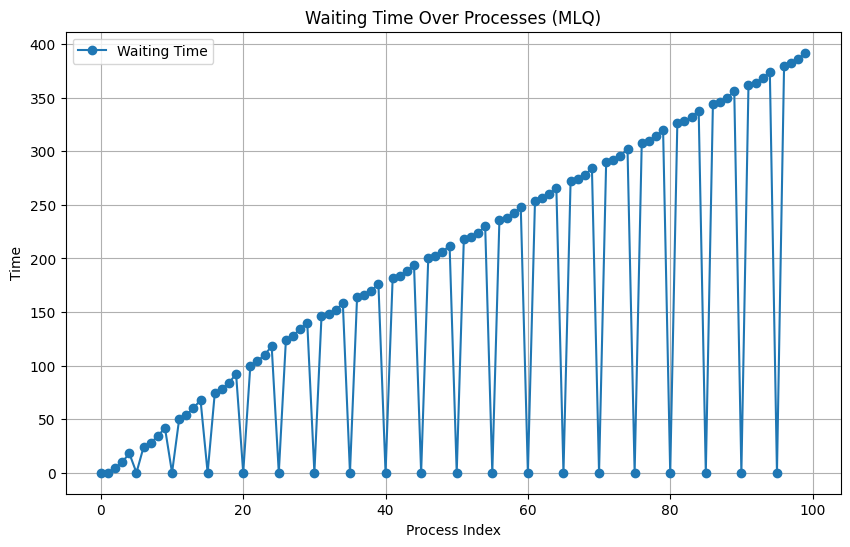

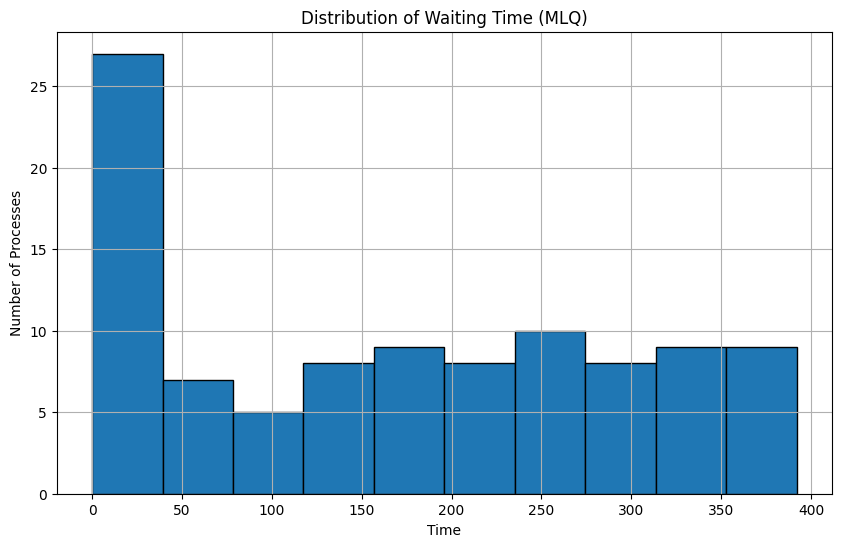

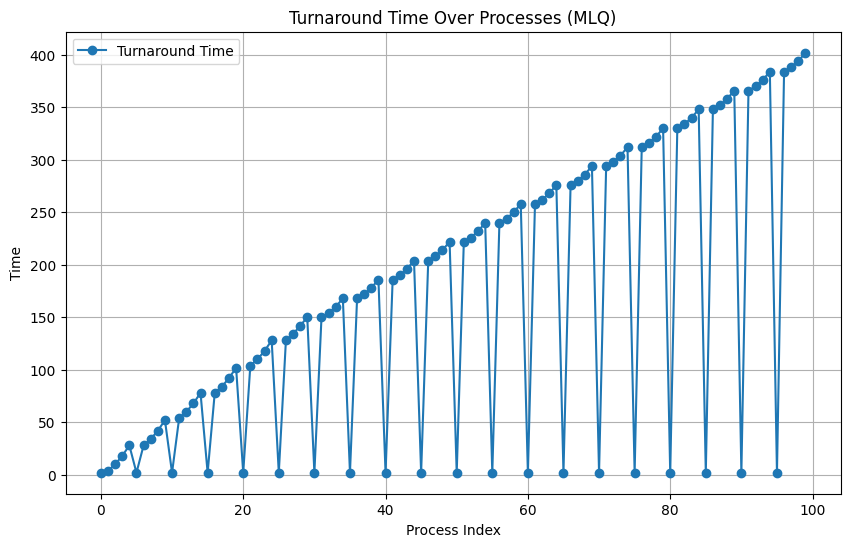

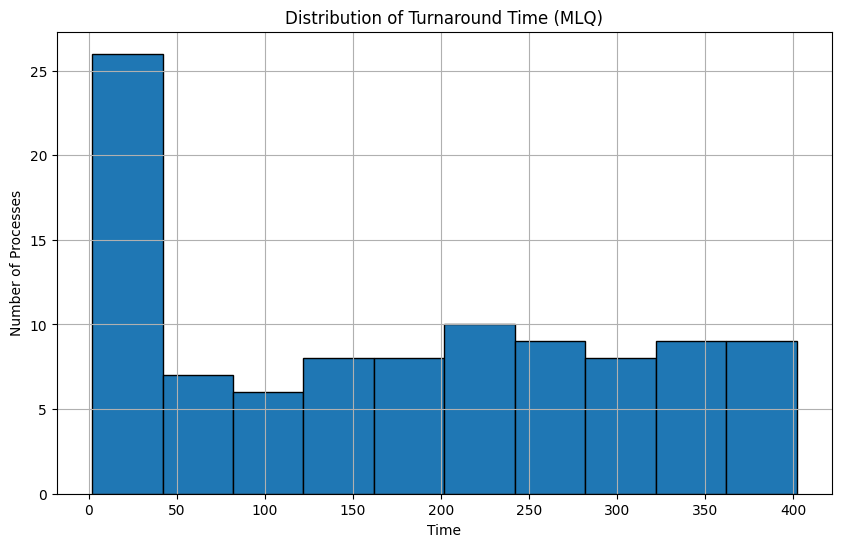

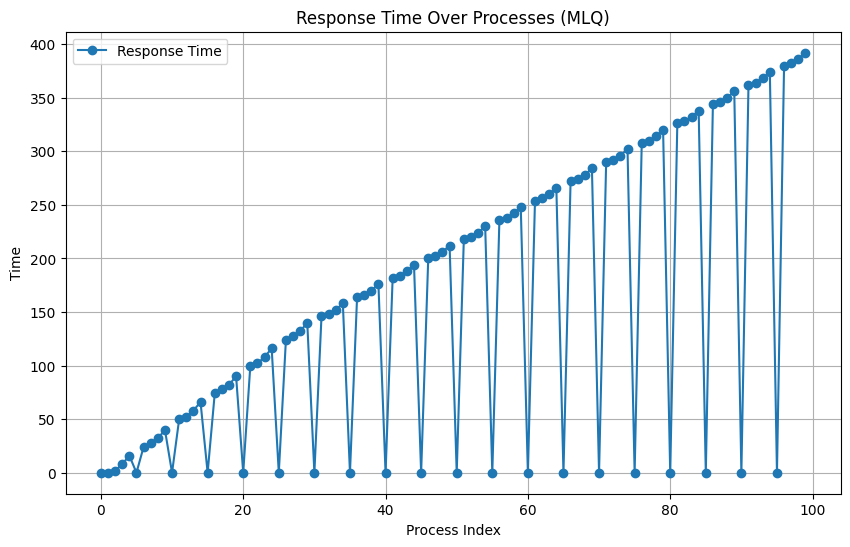

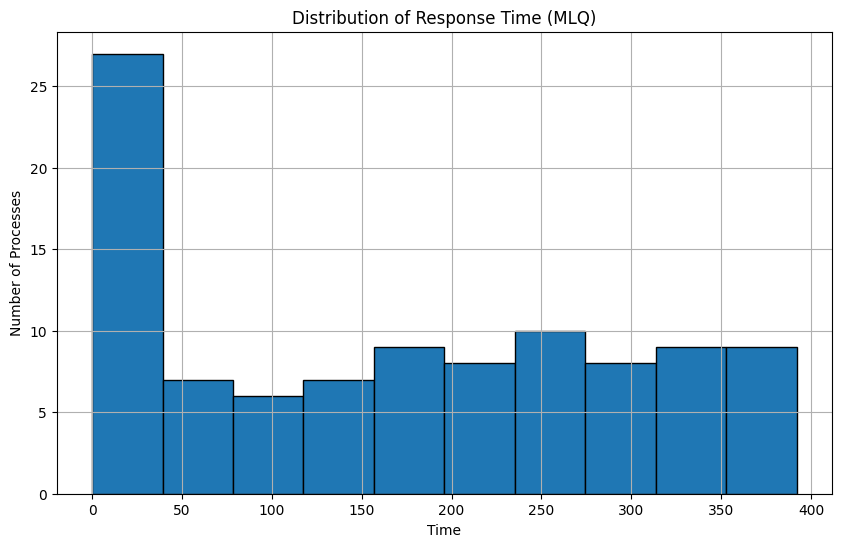

In [384]:
for idx in range(len(metrics_mlq)):
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlq_metrics[metrics_mlq[idx]], marker='o', label=metrics_mlq[idx])
    plt.title(f'{metrics_mlq[idx]} Over Processes (MLQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()

    times = df_mlq_metrics[metrics_mlq[idx]]
    plt.figure(figsize=(10, 6))
    plt.hist(times, bins=10, edgecolor='black')
    plt.title(f'Distribution of {metrics_mlq[idx]} (MLQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.grid()
    plt.show()

## Multilevel Feedback Queue Scheduler (MLFQ)

In [385]:
algo2 = "mlfq"

In [386]:
df_mlfq_metrics = df.read_csv(f"{algo2}_metrics.csv")
df_mlfq_timeline = df.read_csv(f"{algo2}_timeline.csv")

In [387]:
display(df_mlfq_timeline.head())

,Time,Process
0,0,P1
1,1,P1
2,2,P2
3,3,P2
4,4,P2


In [388]:
display(df_mlfq_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,0,2,1,0,2,0,2,0
1,P2,2,4,2,2,6,0,4,0
2,P3,4,6,3,6,14,4,10,2
3,P4,6,8,4,138,148,134,142,132
4,P5,8,10,5,148,160,142,152,140


In [389]:
metrics_mlfq = df_mlfq_metrics.columns[-3:]
averages_mlfq = df_mlfq_metrics[metrics_mlfq].mean()
print("Average Metrics for MLFQ:")
print(averages_mlfq)

Average Metrics for MLFQ:
Waiting Time       161.38
Turnaround Time    167.38
Response Time      135.98
dtype: float64


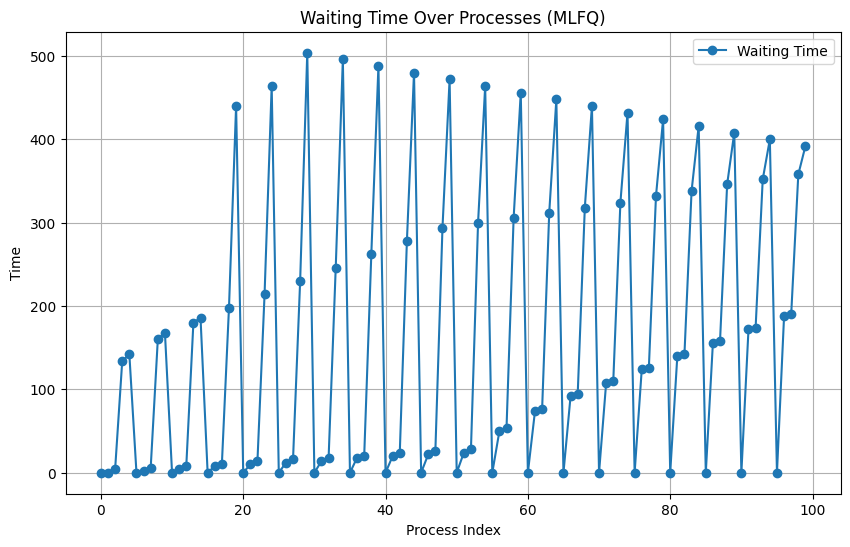

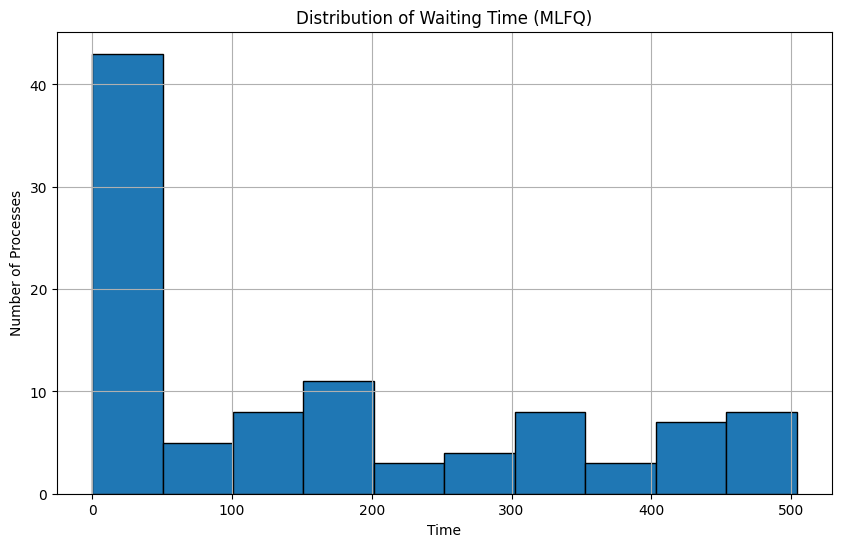

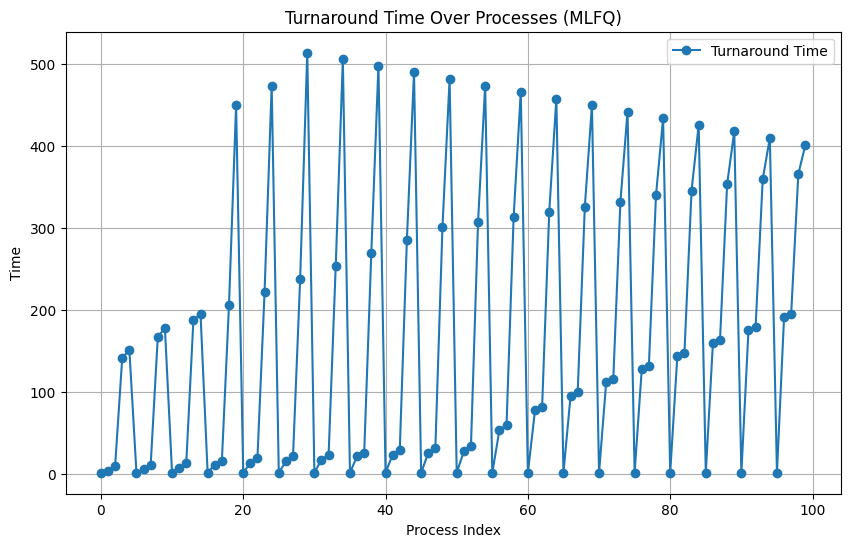

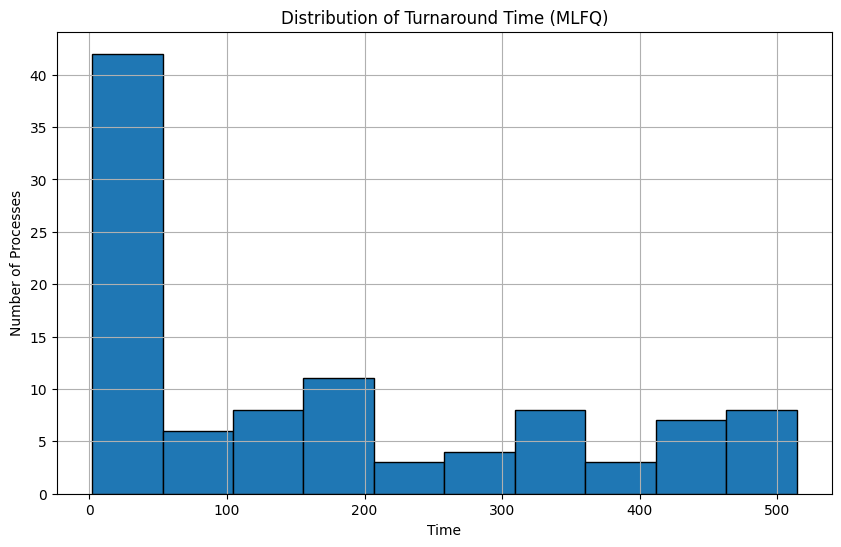

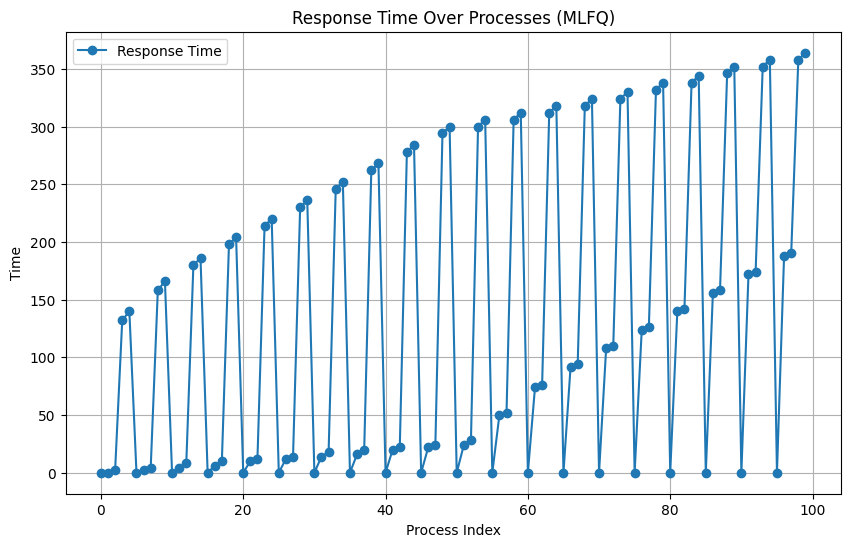

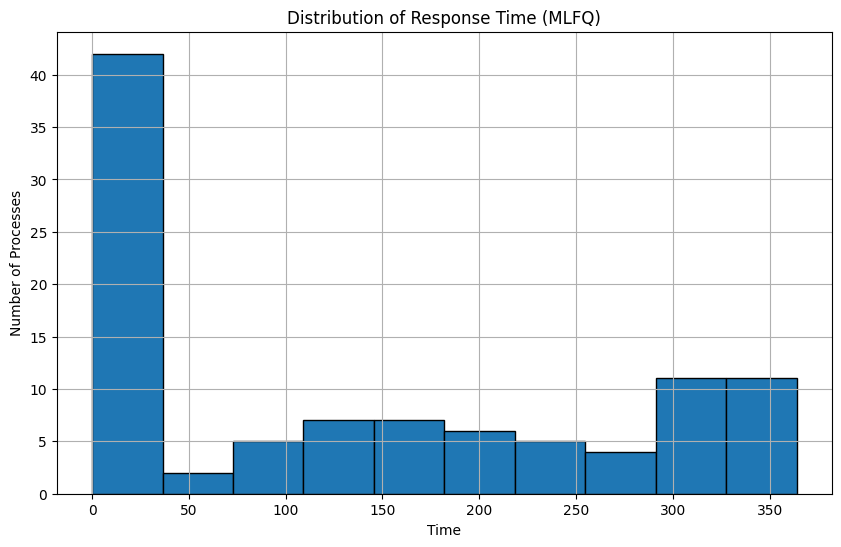

In [390]:
for idx in range(len(metrics_mlfq)):
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlfq_metrics[metrics_mlfq[idx]], marker='o', label=metrics_mlfq[idx])
    plt.title(f'{metrics_mlfq[idx]} Over Processes (MLFQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()

    times = df_mlfq_metrics[metrics_mlfq[idx]]
    plt.figure(figsize=(10, 6))
    plt.hist(times, bins=10, edgecolor='black')
    plt.title(f'Distribution of {metrics_mlfq[idx]} (MLFQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.grid()
    plt.show()

## Comparative Analysis

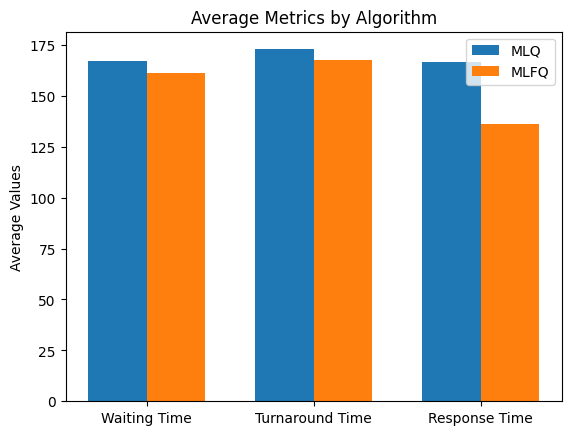

In [391]:
labels = metrics_mlq.tolist()
mlq_means = averages_mlq.values
mlfq_means = averages_mlfq.values
x = np.arange(len(labels))  
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mlq_means, width, label='MLQ')
rects2 = ax.bar(x + width/2, mlfq_means, width, label='MLFQ')
ax.set_ylabel('Average Values')
ax.set_title('Average Metrics by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [392]:
diferences = averages_mlq.values - averages_mlfq.values
print("Diferences between MLQ and MLFQ:")
for label, diff in zip(labels, diferences):
    print(f"{label}: {diff:.2f}")

Diferences between MLQ and MLFQ:
Waiting Time: 5.48
Turnaround Time: 5.48
Response Time: 30.60


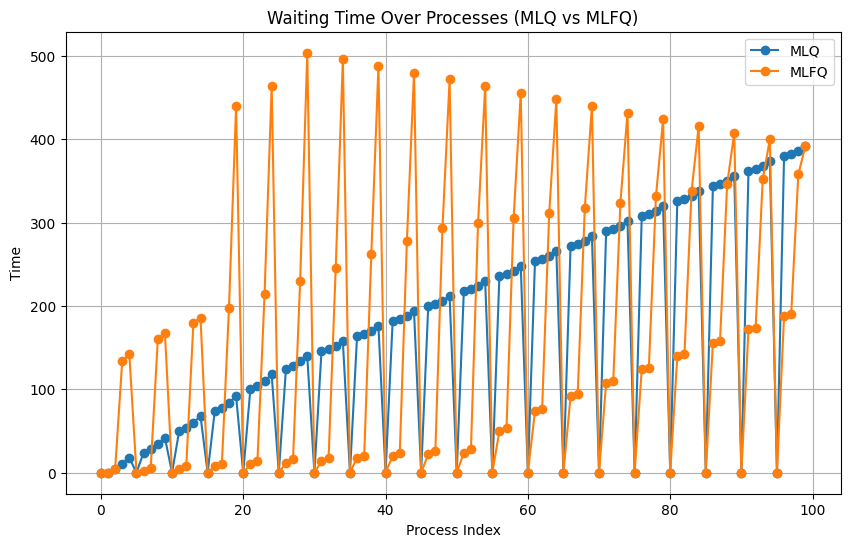

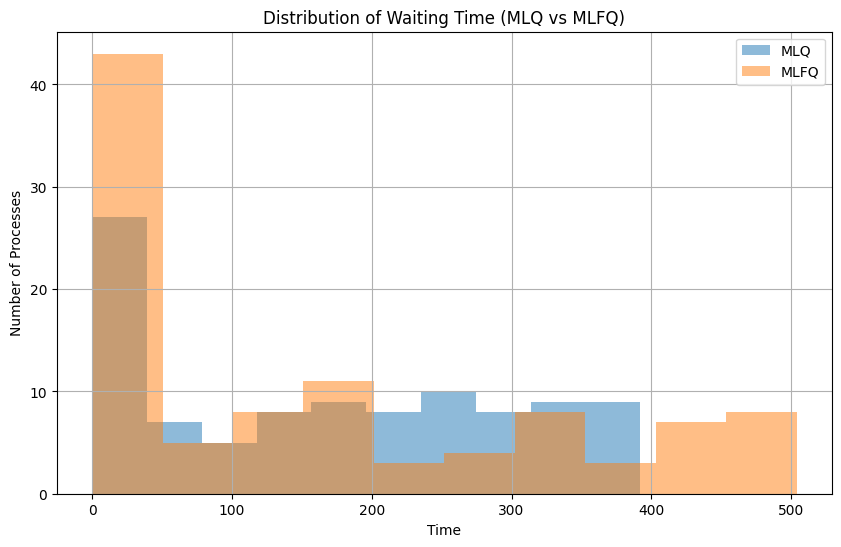

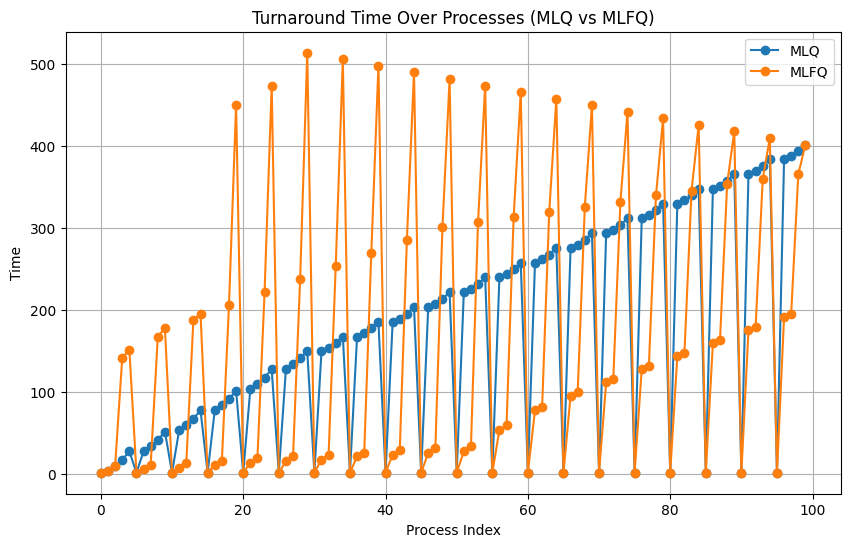

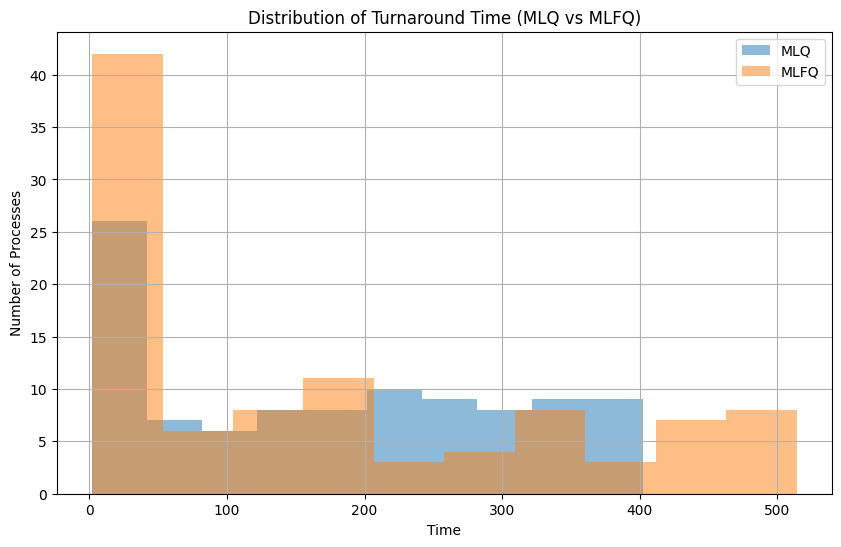

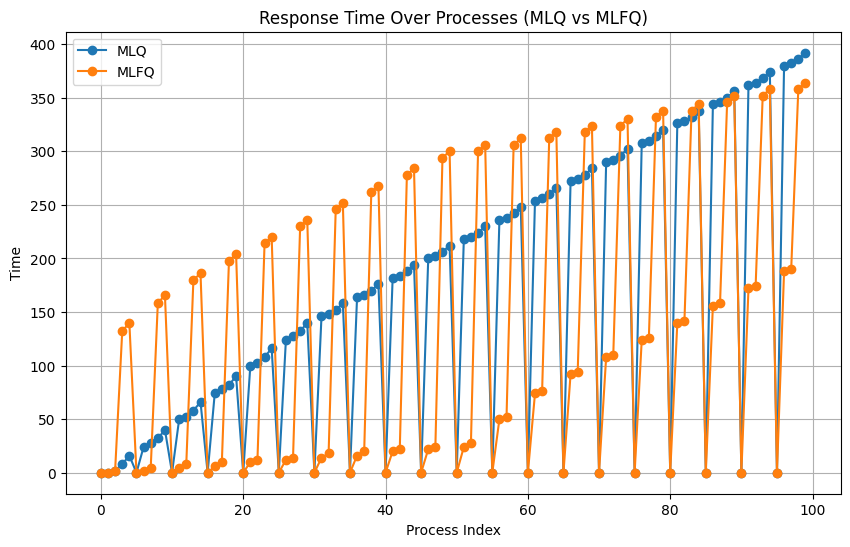

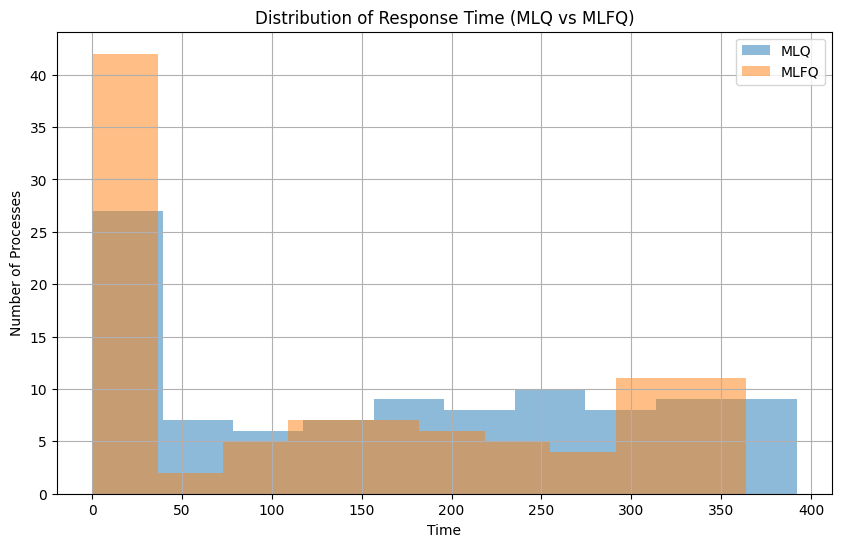

In [393]:
for metric in metrics_mlq:
    plt.figure(figsize=(10, 6))
    plt.plot(df_mlq_metrics[metric], marker='o', label='MLQ')
    plt.plot(df_mlfq_metrics[metric], marker='o', label='MLFQ')
    plt.title(f'{metric} Over Processes (MLQ vs MLFQ)')
    plt.xlabel('Process Index')
    plt.ylabel('Time')
    plt.legend()
    plt.grid()
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.hist(df_mlq_metrics[metric], bins=10, alpha=0.5, label='MLQ')
    plt.hist(df_mlfq_metrics[metric], bins=10, alpha=0.5, label='MLFQ')
    plt.title(f'Distribution of {metric} (MLQ vs MLFQ)')
    plt.xlabel('Time')
    plt.ylabel('Number of Processes')
    plt.legend()
    plt.grid()
    plt.show()

### Short vs long processes

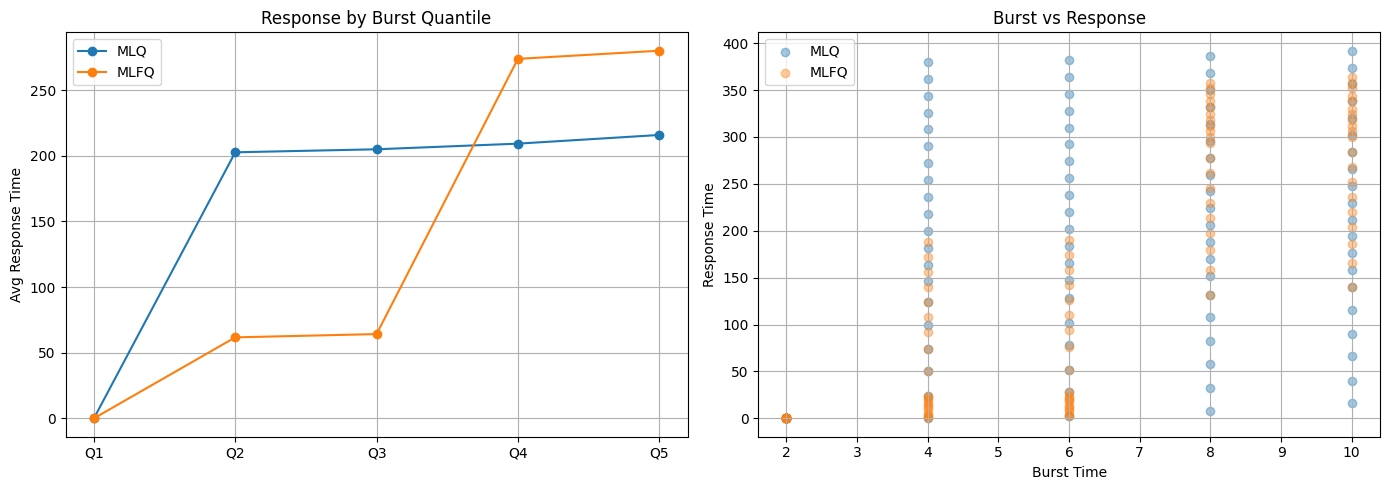

In [394]:
# Q1 shorter processes - Q5 longer processes
bins = pd.qcut(df_mlq_metrics["Burst"], 5)
mlq_group = df_mlq_metrics.groupby(bins)["Response Time"].mean()
mlfq_group = df_mlfq_metrics.groupby(bins)["Response Time"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(mlq_group.values, marker='o', label="MLQ")
axes[0].plot(mlfq_group.values, marker='o', label="MLFQ")
axes[0].set_xticks(range(len(mlq_group)))
axes[0].set_xticklabels([f"Q{i+1}" for i in range(len(mlq_group))])
axes[0].set_ylabel("Avg Response Time")
axes[0].set_title("Response by Burst Quantile")
axes[0].legend()
axes[0].grid()

axes[1].scatter(df_mlq_metrics["Burst"],
                df_mlq_metrics["Response Time"],
                alpha=0.4,
                label="MLQ")
axes[1].scatter(df_mlfq_metrics["Burst"],
                df_mlfq_metrics["Response Time"],
                alpha=0.4,
                label="MLFQ")
axes[1].set_xlabel("Burst Time")
axes[1].set_ylabel("Response Time")
axes[1].set_title("Burst vs Response")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

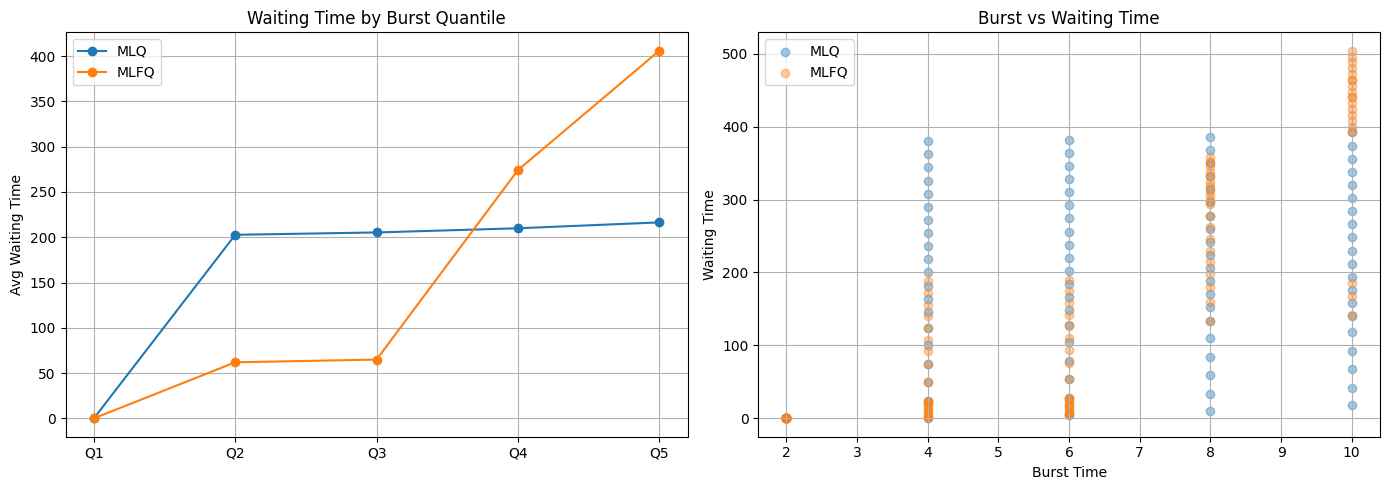

In [395]:
bins = pd.qcut(df_mlq_metrics["Burst"], 5)
mlq_group = df_mlq_metrics.groupby(bins)["Waiting Time"].mean()
mlfq_group = df_mlfq_metrics.groupby(bins)["Waiting Time"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(mlq_group.values, marker='o', label="MLQ")
axes[0].plot(mlfq_group.values, marker='o', label="MLFQ")
axes[0].set_xticks(range(len(mlq_group)))
axes[0].set_xticklabels([f"Q{i+1}" for i in range(len(mlq_group))])
axes[0].set_ylabel("Avg Waiting Time")
axes[0].set_title("Waiting Time by Burst Quantile")
axes[0].legend()
axes[0].grid()

axes[1].scatter(df_mlq_metrics["Burst"],
                df_mlq_metrics["Waiting Time"],
                alpha=0.4,
                label="MLQ")
axes[1].scatter(df_mlfq_metrics["Burst"],
                df_mlfq_metrics["Waiting Time"],
                alpha=0.4,
                label="MLFQ")
axes[1].set_xlabel("Burst Time")
axes[1].set_ylabel("Waiting Time")
axes[1].set_title("Burst vs Waiting Time")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [396]:
# pip freeze > requirements.txt